In [1]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data  
nnfs.init()
np.random.seed(0)
X, y = spiral_data(100, 3)   



## each neuron gets its own bias and each input gets its own weight

In [2]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, X):
        self.inputs = X
        self.output = np.dot(X,self.weights)+self.biases
        return self.output
    def backward(self,dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        #  # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        return self.dinputs

  


In [3]:
class Activation_ReLU:
    def forward(self,inputs):
        self.inputs = inputs #remember input values
        self.output = np.maximum(0,inputs)
    def backward(self,dvalues):
        # Since we need to modify the original variable,
        #  # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        #  # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
        return self.dinputs

### keep the sum_vals normalized

In [4]:
class Activation_Softmax:
    def forward(self,inputs):
        sum_vals = np.exp(inputs-np.max(inputs))
      
        self.output = sum_vals / np.sum(sum_vals, axis=1,keepdims=True)
    def backward(self,dvalues):
        return

class Activation_SoftMax_crosscategorical_loss():
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = loss_Categorical
        return 


<h1>Loss classes</h1>

In [5]:
class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        self.data_loss = np.mean(sample_losses)
       
        return self.data_loss


In [6]:
class loss_CategoricalCrossEntropy(Loss):
    def forward(self,y_pred,y_true):
        samples = len(y_pred)
        y_clipped = np.clip(y_pred,1e-7,1-1e-7)
        if len(y_true.shape) == 1:# you have passed a scalar value
            correct_conf = y_clipped[range(samples),y_true]#this extracts rows first and the second part tells u the prediction we wanted

        elif len(y_true.shape) ==2:
            correct_conf = np.sum(y_clipped*y_true, axis = 1)

        negative_likelihoods = -np.log(correct_conf)
        return negative_likelihoods
  
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [7]:
class Activation_SoftMax_crosscategorical_loss():
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = loss_CategoricalCrossEntropy()
        return 

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output,y_true)

    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        if(y_true.shape) == 2: # if values of y_true are one hot encoded turn them into discrete values of 1d array
            y_true = np.argmax(y_true, axis = 1)
        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1
        #Normalize gradients
        self.dinputs = self.dinputs/samples
        

        return 

In [8]:
class loss_mse(Loss):
    def forward(self, y_pred, y_true):
        self.diff = (y_pred - y_true)
        self.numerator = self.diff**2
        return self.numerator
    def backward(self):
        self.output = 2*self.diff/np.size(self.numerator)
        return self.output

In [9]:
class optimizer_SGD:
    def __init__(self, learning_rate = 1):
        self.learning_rate = learning_rate
        return 
    def update(self,layer):
        """
        Updates the layer's weights and biases using calculated gradients.
        Args:
            learning_rate (float): The learning rate for parameter updates.
        """
        # Standard Gradient Descent update rule: parameter = parameter - learning_rate * gradient
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases

In [10]:
import numpy as np

def create_batches(data, batch_size, shuffle=False):
    """
    Divides the rows of a NumPy array into batches of a specified size.

    Args:
        data (np.ndarray): The input NumPy array (features/rows).
                           Expected shape: (num_samples, num_features).
        batch_size (int): The desired size of each batch.
        shuffle (bool): If True, shuffles the data before batching.
                        (Recommended for training data).

    Yields:
        np.ndarray: A batch of data. The last batch might be smaller.
    """
    num_samples = data.shape[0]

    # Optional: Shuffle the data
    if shuffle:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        data = data[indices]

    # Iterate through the data in chunks of batch_size
    for i in range(0, num_samples, batch_size):
        # Slice the data to get the current batch
        batch = data[i:i + batch_size]
        yield batch


# 1. Create a sample NumPy array
num_samples = 100
num_features = 5
sample_data = np.arange(num_samples * num_features).reshape(num_samples, num_features)

print("Original Data (first 5 rows):\n", sample_data[:5])
print("Original Data Shape:", sample_data.shape)

# 2. Divide into batches
desired_batch_size = 17 # Let's pick a size that doesn't perfectly divide 100

print(f"\n--- Batching with batch_size = {desired_batch_size} ---")
batches = list(create_batches(sample_data, desired_batch_size)) # Convert generator to list for demonstration

for i, batch in enumerate(batches):
    print(f"\nBatch {i+1} Shape: {batch.shape}")
    print(f"Batch {i+1} (first row):\n", batch[0] if batch.shape[0] > 0 else "Empty Batch")
    # if you want to see the whole batch: print(batch)

print(f"\nTotal number of batches: {len(batches)}")
print(f"Shape of the last batch: {batches[-1].shape}") # The last batch (100 % 17 = 15 rows)

# 3. Example with shuffling
print(f"\n--- Batching with shuffling (batch_size = {desired_batch_size}) ---")
shuffled_batches = list(create_batches(sample_data, desired_batch_size, shuffle=True))

print("First batch from shuffled data (first 5 rows):\n", shuffled_batches[0][:5])
print("Note: The order of elements is randomized compared to original data.")

# 4. Using the generator directly (recommended in loops)
print(f"\n--- Direct Generator Use (batch_size = 20) ---")
for i, batch in enumerate(create_batches(sample_data, 20)):
    if i < 2: # Print only first two batches for brevity
        print(f"Processing Batch {i+1}, Shape: {batch.shape}")

Original Data (first 5 rows):
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Original Data Shape: (100, 5)

--- Batching with batch_size = 17 ---

Batch 1 Shape: (17, 5)
Batch 1 (first row):
 [0 1 2 3 4]

Batch 2 Shape: (17, 5)
Batch 2 (first row):
 [85 86 87 88 89]

Batch 3 Shape: (17, 5)
Batch 3 (first row):
 [170 171 172 173 174]

Batch 4 Shape: (17, 5)
Batch 4 (first row):
 [255 256 257 258 259]

Batch 5 Shape: (17, 5)
Batch 5 (first row):
 [340 341 342 343 344]

Batch 6 Shape: (15, 5)
Batch 6 (first row):
 [425 426 427 428 429]

Total number of batches: 6
Shape of the last batch: (15, 5)

--- Batching with shuffling (batch_size = 17) ---
First batch from shuffled data (first 5 rows):
 [[220 221 222 223 224]
 [145 146 147 148 149]
 [ 45  46  47  48  49]
 [305 306 307 308 309]
 [370 371 372 373 374]]
Note: The order of elements is randomized compared to original data.

--- Direct Generator Use (batch_size = 20) ---
Processing Batch 1, Sha

In [11]:
def predict():
    """returns the prediction of the nn based on the input(or input batch given"""
    return

In [12]:
dense1 = Layer_Dense(2,3)
dense1.forward(X)
relu = Activation_ReLU()
softies = Activation_Softmax()
relu.forward(dense1.output)
dense2 = Layer_Dense(3,3)
dense2.forward(relu.output)
softies.forward(dense2.output)


loss_function = loss_CategoricalCrossEntropy()
softies.output[:5]
print("loss:",loss_function.calculate(softies.output,y))
class_targets = [0,1,1]


loss: 1.098609


In [13]:
predictions = np.argmax(softies.output,axis = 1)

In [14]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
accuracy = np.mean(predictions == y)

In [16]:
print( "acc:", accuracy)

acc: 0.3466666666666667


gradient descent is e.g w0 = w0-alpha*partialderiv(loss wrt. w0)  dloss/dw0

this will happent to each of the weights

but for b it will be b = b- alpha * (dloss/db)

this utilizes the chain rule 

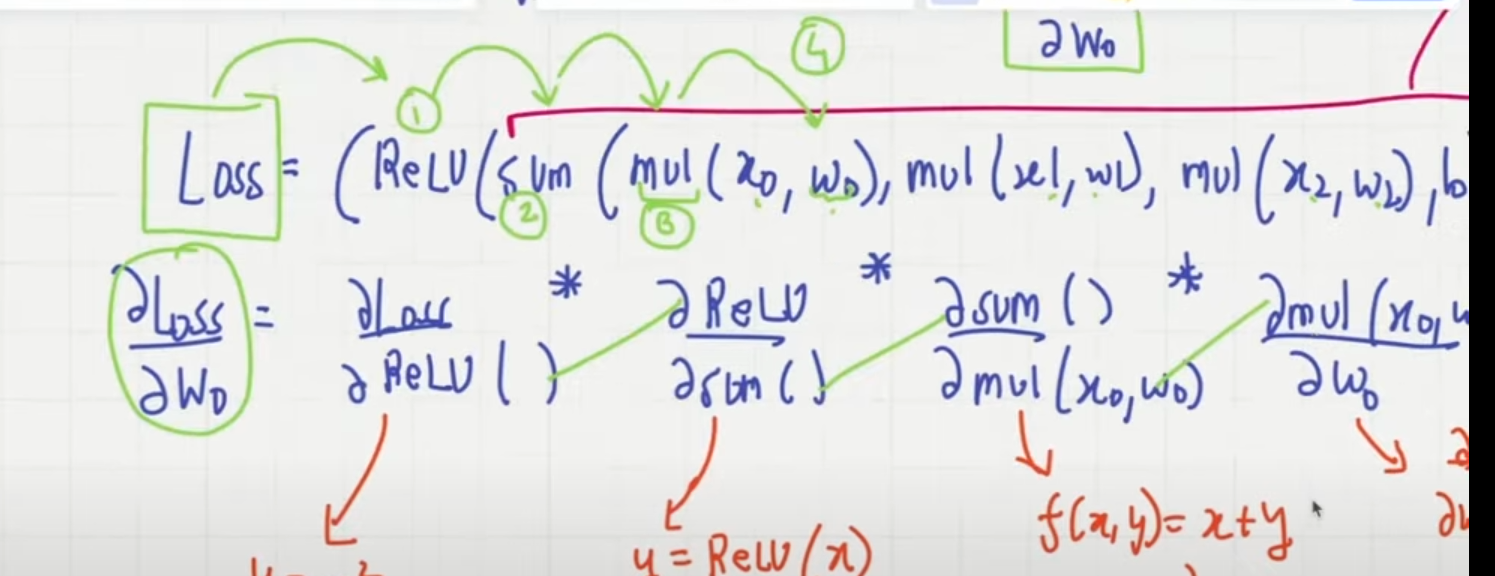

In [17]:
x_time = np.linspace(0, 3, 20).reshape(-1,1)
y =  x_time*2 +3
y

array([[3.        ],
       [3.31578947],
       [3.63157895],
       [3.94736842],
       [4.26315789],
       [4.57894737],
       [4.89473684],
       [5.21052632],
       [5.52631579],
       [5.84210526],
       [6.15789474],
       [6.47368421],
       [6.78947368],
       [7.10526316],
       [7.42105263],
       [7.73684211],
       [8.05263158],
       [8.36842105],
       [8.68421053],
       [9.        ]])

In [18]:
dense1 = Layer_Dense(1,1)
L = loss_mse()
for epoch in range(10000):
    out = dense1.forward(x_time)
    lossv = L.calculate(dense1.output,y)
    dloss = L.backward()
    if epoch % 1000 == 0:
        print('loss:', lossv)
    dense1.backward(dloss)
    sg = optimizer_SGD(learning_rate = 0.01)
    sg.update(dense1)


    #print(L.calculate(, y_pred))

loss: 39.09765112553765
loss: 0.00011896944096987053
loss: 2.266163700203709e-08
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10
loss: 2.9490829427878554e-10


In [19]:
dense1.weights 

array([[2.0000176]], dtype=float32)

In [20]:
dense1.biases

array([[2.9999676]], dtype=float32)

<h1>reading and training from mnist</h1>


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data_train = pd.read_csv('mnist_train.csv')
data_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#dropping first column as they are the labels

labels = data_train.iloc[:,0]
#converting to np array
labels = labels.to_numpy()
labels[47]

np.int64(9)

In [24]:
x_val = data_train.to_numpy()[:,1:]
x_train = x_val/255
np.max(x_train,axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
x_batches = list(create_batches(x_train,32))
y_batches = list(create_batches(labels,32))
x_train.shape, labels.shape

((59999, 784), (59999,))

In [26]:
x_batches[:2]
len(y_batches[-2])

32

<h1>create input layers</h1>

In [27]:
layer1 = Layer_Dense(x_train.shape[1],128)
activation1 = Activation_ReLU()
layer2 = Layer_Dense(128,128)
activation2 = Activation_ReLU()
layer3 = Layer_Dense(128,10)
loss_activation = Activation_SoftMax_crosscategorical_loss()
opt = optimizer_SGD(learning_rate = 0.01)

In [28]:
for epoch in range(10):
    sum_of_losses = 0
    y_pred = np.array(list())
    for xbatch,ybatch in zip(x_batches,y_batches):
        
        layer1.forward(xbatch)
        activation1.forward(layer1.output)
        layer2.forward(activation1.output)
        activation2.forward(layer2.output)
        layer3.forward(activation2.output)
        l = loss_activation.forward(layer3.output,ybatch)
        # sum_of_losses += l
        #backwardpass
        loss_activation.backward(loss_activation.output,ybatch)
        layer3.backward(loss_activation.dinputs)
        activation2.backward(layer3.dinputs)
        layer2.backward(activation2.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)

        
        #concatenate predictions for accuracy test
        predictions = np.argmax(loss_activation.output, axis=1)
        y_pred = np.concatenate((y_pred,predictions),axis = 0)
        # print(y_pred, 'next' , ybatch)
        #update params
        opt.update(layer1)
        opt.update(layer2)
        opt.update(layer3)

    #metrics
        
    # l = l
    # print(predictions.shape)
    # print(ybatch.shape)
    if len(ybatch.shape) == 2:
     y = np.argmax(ybatch, axis=1)
    accuracy = np.mean(y_pred == labels)
    print('loss:', l, '    acc:', accuracy)

loss: 2.2828453     acc: 0.1172852880881348
loss: 0.5900863     acc: 0.4422073701228354
loss: 0.3758506     acc: 0.7994133235553926
loss: 0.26688868     acc: 0.8601310021833697
loss: 0.20979558     acc: 0.8915315255254255
loss: 0.16816537     acc: 0.9059317655294254
loss: 0.13777496     acc: 0.916381939698995
loss: 0.1141458     acc: 0.9243820730345506
loss: 0.09530375     acc: 0.9329822163702728
loss: 0.07953613     acc: 0.939748995816597


In [29]:

layer1.forward(x_batches[0])
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
layer3.forward(activation2.output)
l = loss_activation.forward(layer3.output,y_batches[0])

In [30]:
y_batches[0]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6])

In [31]:
np.mean(np.argmax(loss_activation.output,axis = 1) == y_batches[0])

np.float64(0.9375)

In [32]:
np.argmax(loss_activation.output,axis = 1)

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 7, 1, 3, 8, 6])

In [49]:
layer1.forward(x_train[5999])
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
layer3.forward(activation2.output)
l = loss_activation.forward(layer3.output,labels)

In [50]:
np.argmax(loss_activation.output,axis = 1)

array([6])

In [36]:
data_test = pd.read_csv('mnist_test.csv', header=None)
data_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x_test = data_test.iloc[:,1:]
x_test.to_numpy()
y_test = data_test.iloc[:,0]
y_test = y_test.to_numpy()

x_test = x_test/255

In [41]:
layer1.forward(x_test)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
layer3.forward(activation2.output)
l = loss_activation.forward(layer3.output,y_test)

In [42]:
np.mean(np.argmax(loss_activation.output,axis = 1) == y_test)

np.float64(0.9396)

In [45]:
y_test[1]

np.int64(2)

In [44]:
np.argmax(loss_activation.output,axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

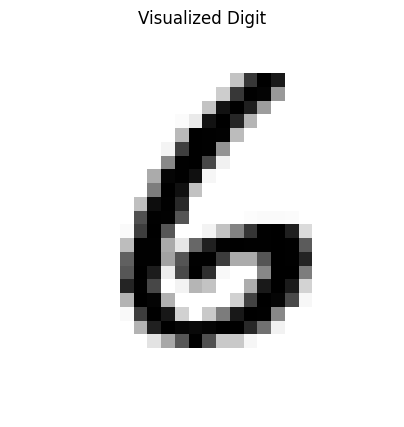

In [48]:
image_array = x_train[5999].reshape(28,28) # Random pixels


plt.figure(figsize=(5, 5)) # Set figure size
plt.imshow(image_array, cmap='gray_r') # Display the array as an image
plt.title("Visualized Digit") # Add a title
plt.axis('off') # Hide axes
plt.show() # Show the